In [1]:
import pandas as pd
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt


In [3]:
# Load the training dataset
train_data = pd.read_csv('soc-redditHyperlinks-body-test.tsv', delimiter='\t')

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Create a defaultdict to store sentiment information between subreddits
sentiment_data = defaultdict(lambda: {'positive': 0, 'negative': 0})

# Iterate through the training data to build the graph and aggregate sentiment information
for index, row in train_data.iterrows():
    source_subreddit = row['SOURCE_SUBREDDIT']
    target_subreddit = row['TARGET_SUBREDDIT']
    sentiment = row['LINK_SENTIMENT']

    # Add nodes (subreddits) to the graph
    G.add_node(source_subreddit)
    G.add_node(target_subreddit)

    # Add an edge and update sentiment information
    G.add_edge(source_subreddit, target_subreddit)
    if sentiment == 1:
        sentiment_data[(source_subreddit, target_subreddit)]['positive'] += 1
    elif sentiment == -1:
        sentiment_data[(source_subreddit, target_subreddit)]['negative'] += 1

# Predict sentiment for test set posts based on the graph structure (heuristics)
def predict_sentiment(source_subreddit, target_subreddit):
    if G.has_edge(source_subreddit, target_subreddit):
        sentiment_info = sentiment_data[(source_subreddit, target_subreddit)]
        if sentiment_info['positive'] > sentiment_info['negative']:
            return 1  # Predict positive sentiment
        elif sentiment_info['positive'] < sentiment_info['negative']:
            return -1  # Predict negative sentiment
    return 0  # Predict neutral sentiment if no edge exists or sentiments are balanced

# Load the test dataset
test_data = pd.read_csv('soc-redditHyperlinks-body-test.tsv', delimiter='\t')

# Predict sentiment for test set posts using the graph-based heuristic
test_data['PREDICTED_SENTIMENT'] = test_data.apply(lambda row: predict_sentiment(row['SOURCE_SUBREDDIT'], row['TARGET_SUBREDDIT']), axis=1)

# Save the results to a CSV file
test_data.to_csv('test_data_with_predictions.csv', index=False)

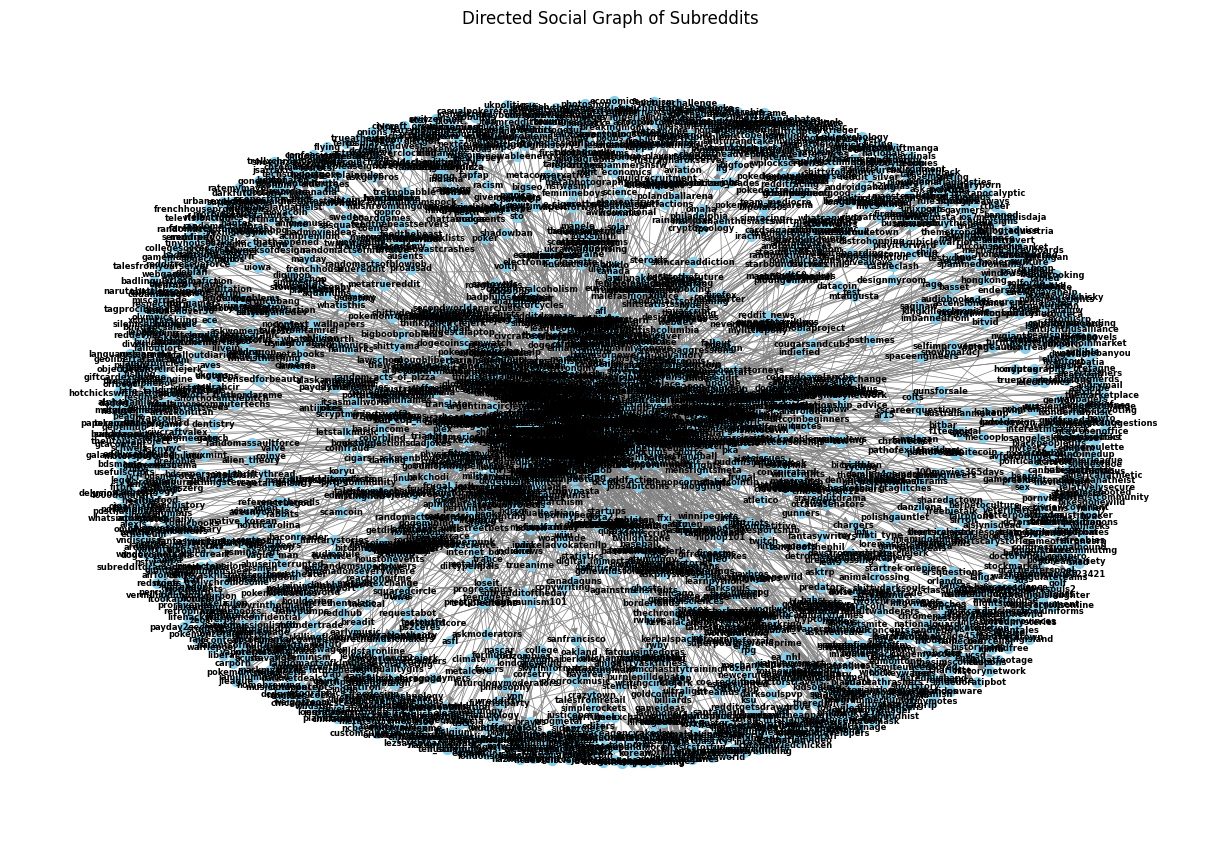

In [6]:
# Draw and display the graph
pos = nx.spring_layout(G)  # Layout for node positioning
labels = {node: node for node in G.nodes()}  # Label nodes with their names

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=50, node_color='skyblue', font_size=6, font_color='black', font_weight='bold', edge_color='gray', width=0.5, arrowsize=10)

plt.title("Directed Social Graph of Subreddits")
plt.axis('off')  # Turn off axis labels

plt.show()